# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Sigmoid function

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [3]:
x = np.arange(-10,11)

y = sigmoid(x)

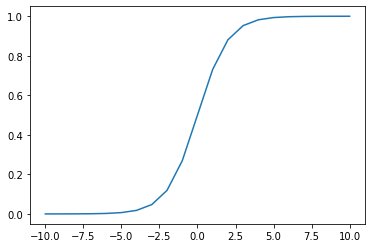

In [4]:
plt.plot(x,y)
plt.show()

In [5]:
df = pd.read_csv("insurance.csv")

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


## Check data balance

In [7]:
df["insuranceclaim"].value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

## Train test split

In [8]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
X.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [10]:
y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

## Baseline model

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
log = LogisticRegression()

In [15]:
log.fit(X_train,y_train)

/home/sukamal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
log.score(X_test,y_test)

0.8034825870646766

In [17]:
y_pred = log.predict(X_test)

## Evaluation metrics

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [19]:
accuracy_score(y_test,y_pred)

0.8034825870646766

In [20]:
precision_score(y_test,y_pred)

0.8192307692307692

In [21]:
recall_score(y_test,y_pred)

0.8693877551020408

In [22]:
f1_score(y_test,y_pred)

0.8435643564356436

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.70      0.74       157
           1       0.82      0.87      0.84       245

    accuracy                           0.80       402
   macro avg       0.80      0.79      0.79       402
weighted avg       0.80      0.80      0.80       402



In [25]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [26]:
print(tp,fp)
print(fn,tn)

213 47
32 110
